In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fashion_mnist_data = keras.datasets.fashion_mnist
(all_x_train, all_y_train), (x_test,y_test) = fashion_mnist_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
all_x_train = all_x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
print(f'all_xtrain.shape = {all_x_train.shape}')
print(f'all_x_train[0].shape = {all_x_train[0].shape}')
print(f'all_x_train[0].shape = {all_x_train[0].dtype }')

all_xtrain.shape = (60000, 28, 28)
all_x_train[0].shape = (28, 28)
all_x_train[0].shape = float32


In [ ]:
x_validation, x_train = all_x_train[:5000] / 255.0, all_x_train[5000:] / 255.0
y_validation, y_train = all_y_train[:5000], all_y_train[5000:]

In [ ]:
print(f'x_train.shape = {x_train.shape}')
print(f'x_train[0].shape = {x_train[0].shape}')
print(f'x_train[0].shape = {x_train[0].dtype }')

x_train.shape = (55000, 28, 28)
x_train[0].shape = (28, 28)
x_train[0].shape = float32


In [ ]:
fashion_mnist_class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
for cls in range(10):
  print(cls, ":", fashion_mnist_class_names[y_train[cls]])

0 : Coat
1 : T-shirt/top
2 : Sneaker
3 : Ankle boot
4 : Ankle boot
5 : Ankle boot
6 : Coat
7 : Coat
8 : Dress
9 : Coat


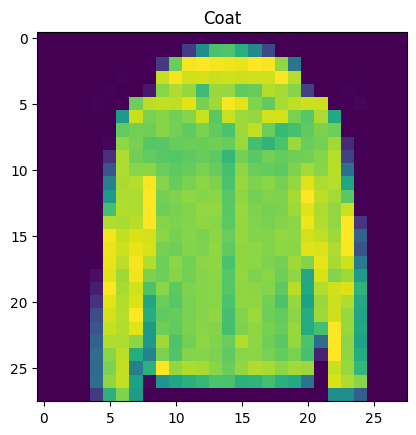

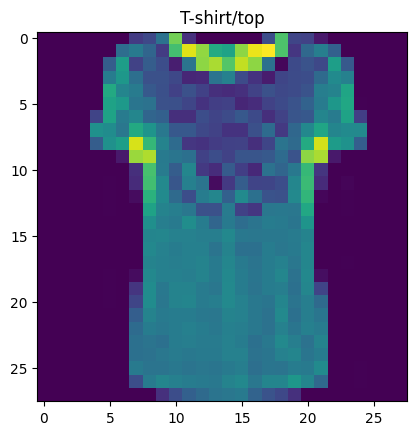

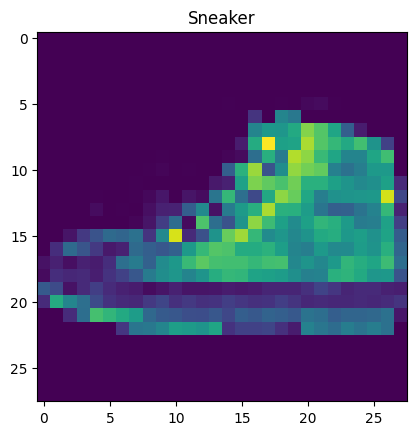

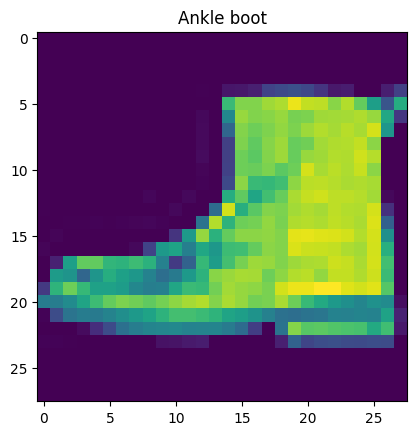

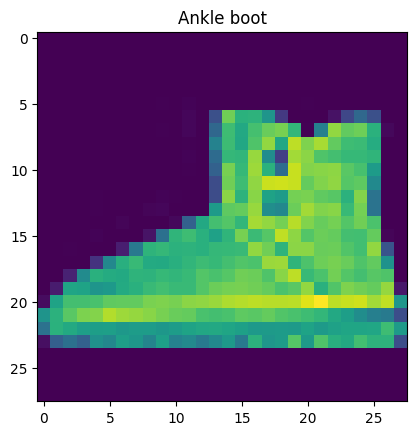

In [ ]:
for i in range(5):
  my_img = x_train[i]
  my_img_class = y_train[i]
  my_img_class_name= fashion_mnist_class_names[my_img_class]
  plt.imshow(my_img)
  plt.title(my_img_class_name)
  plt.show()

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(150, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary( )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 282160 (1.08 MB)
Trainable params: 282160 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [ ]:
results = model.fit (x_train, y_train, epochs= 40, \
                    validation_data = (x_validation, y_validation))


Epoch 1/40
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4795 - accuracy: 0.8336 - val_loss: 0.4520 - val_accuracy: 0.8464
Epoch 2/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4391 - accuracy: 0.8465 - val_loss: 0.4164 - val_accuracy: 0.8544
Epoch 3/40
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4129 - accuracy: 0.8546 - val_loss: 0.3942 - val_accuracy: 0.8624
Epoch 4/40
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3934 - accuracy: 0.8611 - val_loss: 0.3893 - val_accuracy: 0.8642
Epoch 5/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3777 - accuracy: 0.8679 - val_loss: 0.4035 - val_accuracy: 0.8594
Epoch 6/40
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3641 - accuracy: 0.8716 - val_loss: 0.3811 - val_accuracy: 0.8628
Epoch 7/40
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3533 - accuracy: 0.8742 - val_loss: 0.3689 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

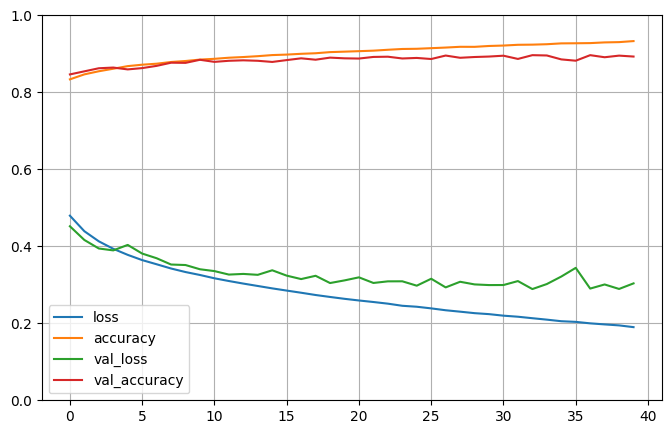

In [ ]:
import pandas as pd
pd.DataFrame(results.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [ ]:
x_test = x_test / 255.0
print("Evaluation de modele:")
model.evaluate(x_test,y_test)

Evaluation de modele:
313/313 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8823


[0.3388688266277313, 0.8823000192642212]

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [ ]:
housing = fetch_california_housing()
all_x_train, x_test, all_y_train, y_test = train_test_split(housing.data, housing.target)

In [ ]:
print(f"all_x_train.shape = {all_x_train.shape}")
print(f"all_x_train.dtype = {all_x_train.dtype}")
print(f"type(all_x_train) = {type(all_x_train)}")
print(f"Features = {all_x_train[0]} ; variable cible = {all_y_train[0]}")

all_x_train.shape = (15480, 8)
all_x_train.dtype = float64
type(all_x_train) = <class 'numpy.ndarray'>
Features = [   5.8343       15.            6.59872611    0.94904459  395.
    2.51592357   32.95       -117.26      ] ; variable cible = 5.00001


In [ ]:
x_train, x_validation, y_train, y_validation = train_test_split(all_x_train, all_y_train)
scaler = StandardScaler()
x_train_scales = scaler.fit_transform(x_train)
x_validation_scaled = scaler.transform(x_validation)
x_test_scaled = scaler.transform(x_test)

In [ ]:
print(f"Le max - min de y_train= [{np.max(y_train)}- {np.min(y_train)}]")
print(f"le max - min de y_validation = [{np.max(y_validation)}- {np.min(y_validation)}] ")
print(f"le max - min de y_test = [{np.max(y_test)} - {np.min(y_test)}")

Le max - min de y_train= [5.00001- 0.14999]
le max - min de y_validation = [5.00001- 0.269] 
le max - min de y_test = [5.00001 - 0.14999


In [ ]:
model= keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu", input_shape=x_train_scales.shape[1:]))
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 15)                465       
                                                                 
 dense_5 (Dense)             (None, 8)                 128       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 872 (3.41 KB)
Trainable params: 872 (3.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="mse", optimizer= "rmsprop", metrics=["mae"])
result = model.fit(x_train_scales, y_train, epochs=100, \
                   validation_data =(x_validation_scaled, y_validation))

Epoch 1/100
363/363 [==============================] - 2s 5ms/step - loss: 1.7923 - mae: 0.9463 - val_loss: 0.6137 - val_mae: 0.5658
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5128 - mae: 0.5095 - val_loss: 0.4671 - val_mae: 0.4845
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4279 - mae: 0.4647 - val_loss: 0.4263 - val_mae: 0.4579
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3959 - mae: 0.4467 - val_loss: 0.4084 - val_mae: 0.4453
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3766 - mae: 0.4369 - val_loss: 0.3930 - val_mae: 0.4375
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3630 - mae: 0.4298 - val_loss: 0.3798 - val_mae: 0.4307
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3529 - mae: 0.4234 - val_loss: 0.3766 - val_mae: 0.4394
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - 

In [ ]:
mae_test = model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3002 - mae: 0.3685
